In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [50]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
           'Uniformity of Cell Shape', 'Marginal Adhesion', 
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
          'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv('breast-cancer-wisconsin.data.csv',names=col)

In [51]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [53]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [54]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [55]:
df = df[df['Bare Nuclei'] != "?"]

In [56]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [58]:
Y = df['Class']

In [61]:
X = df[['Clump Thickness', 'Uniformity of Cell Size', 
           'Uniformity of Cell Shape', 'Marginal Adhesion', 
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
          'Normal Nucleoli', 'Mitoses']]

In [64]:
from sklearn.preprocessing import Normalizer
normalize = Normalizer().fit(X)
X = normalize.transform(X)

In [72]:
columns = ['Clump Thickness', 'Uniformity of Cell Size', 
           'Uniformity of Cell Shape', 'Marginal Adhesion', 
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
          'Normal Nucleoli', 'Mitoses']
X = pd.DataFrame(X)
X.columns= columns
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [73]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.753778,0.150756,0.150756,0.150756,0.301511,0.150756,0.452267,0.150756,0.150756
1,0.319438,0.255551,0.255551,0.319438,0.447214,0.638877,0.191663,0.127775,0.063888
2,0.538816,0.179605,0.179605,0.179605,0.359211,0.359211,0.538816,0.179605,0.179605
3,0.380235,0.506979,0.506979,0.063372,0.190117,0.253490,0.190117,0.443607,0.063372
4,0.609994,0.152499,0.152499,0.457496,0.304997,0.152499,0.457496,0.152499,0.152499


In [75]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Bare Nuclei,0.465904
Mitoses,0.213157
Uniformity of Cell Shape,0.086660
Normal Nucleoli,0.080015
Bland Chromatin,0.066304
Single Epithelial Cell Size,0.035303
Uniformity of Cell Size,0.023118
Marginal Adhesion,0.021649
Clump Thickness,0.007889


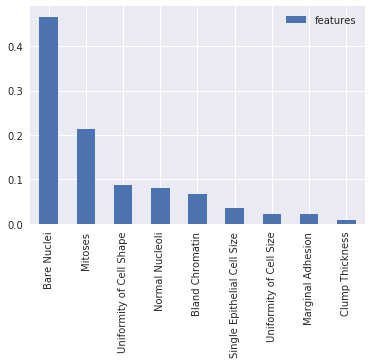

In [77]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Bare Nuclei,0.303891
Mitoses,0.172523
Uniformity of Cell Size,0.145421
Single Epithelial Cell Size,0.144374
Normal Nucleoli,0.076614
Uniformity of Cell Shape,0.052294
Marginal Adhesion,0.035067
Bland Chromatin,0.035046
Clump Thickness,0.034770


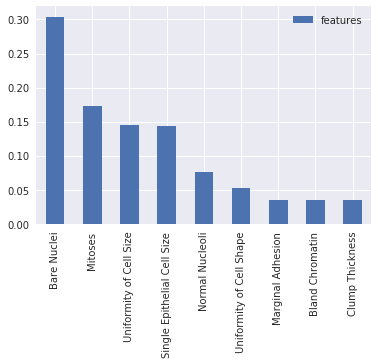

In [80]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [81]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [82]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Marginal Adhesion,0.16
Uniformity of Cell Size,0.14
Single Epithelial Cell Size,0.14
Uniformity of Cell Shape,0.12
Bare Nuclei,0.12
Normal Nucleoli,0.12
Mitoses,0.12
Bland Chromatin,0.06
Clump Thickness,0.02


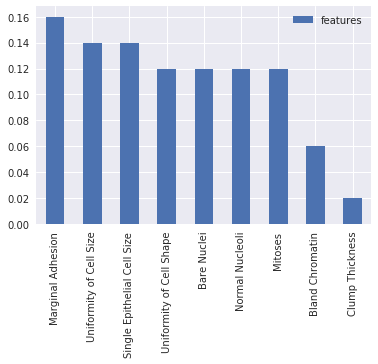

In [83]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [87]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [88]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 

In [91]:
print_score(clf, X_train, Y_train, X_test, Y_test, train=True)

Train Result:

accuracy score: 0.9524

Classification Report: 
              precision    recall  f1-score   support

          2       0.97      0.96      0.96       365
          4       0.92      0.94      0.93       181

avg / total       0.95      0.95      0.95       546


Confusion Matrix: 
 [[350  15]
 [ 11 170]]

Average Accuracy: 	 0.9012
Accuracy SD: 		 0.0289


In [92]:
print_score(clf, X_train, Y_train, X_test, Y_test, train=False)

Test Result:

accuracy score: 0.8978

Classification Report: 
              precision    recall  f1-score   support

          2       0.87      0.97      0.92        79
          4       0.96      0.79      0.87        58

avg / total       0.90      0.90      0.90       137


Confusion Matrix: 
 [[77  2]
 [12 46]]



In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [122]:
params = {'n_neighbors': [1, 3, 5, 7, 9,11],
          'leaf_size':[10,15,20,25,30,35,40]}

In [123]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [124]:
grid_search_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11], 'leaf_size': [10, 15, 20, 25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [125]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [126]:
print_score(grid_search_cv, X_train, Y_train, X_test, Y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          2       1.00      1.00      1.00       365
          4       1.00      1.00      1.00       181

avg / total       1.00      1.00      1.00       546


Confusion Matrix: 
 [[365   0]
 [  0 181]]

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.5s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.4s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits
Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.4s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.4s finished


Average Accuracy: 	 0.8921
Accuracy SD: 		 0.0387


[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.3s finished


In [127]:
print_score(grid_search_cv, X_train, Y_train, X_test, Y_test, train=False)

Test Result:

accuracy score: 0.9051

Classification Report: 
              precision    recall  f1-score   support

          2       0.87      0.99      0.92        79
          4       0.98      0.79      0.88        58

avg / total       0.91      0.91      0.90       137


Confusion Matrix: 
 [[78  1]
 [12 46]]

